In [1]:
from matplotlib.pyplot import cm
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from scipy import constants as cst
import sys, os, git
import warnings
warnings.filterwarnings("ignore")

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_figures = current_path[len(git_path):] + '/'
path_in_folder = current_path[len(git_path)+1:]

In [3]:
sys.path.append(git_path + "/.submodules/pyplot-perso")
from plttools import PltTools

In [10]:
data_path = git_path + "/.submodules/dataset-LJ-fluid/analysis/"
all_temperatures = np.array([0.8, 1.0, 1.2, 1.5, 1.8, 2.2, 2.6, 3.0]) # unitless
ref_time = 463.7943 # LJ time in fs
ref_temp = 50.3219 # LJ temp in K
cmap_cool = cm.cool
cmap_dark_blue_to_cyan = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(0.0)])
cmap_dark_blue_to_pink = LinearSegmentedColormap.from_list('dark_blue_to_cyan', ['#1D11CB', cmap_cool(1.0)])
cmap_cyan_to_green_blue = LinearSegmentedColormap.from_list('cyan_to_green_blue',
    ['#00FFFF', '#00FA9A', '#3683e2']  # Cyan → Medium Spring Green → Your Blue Shade
)

In [28]:
len(all_temperatures)

8

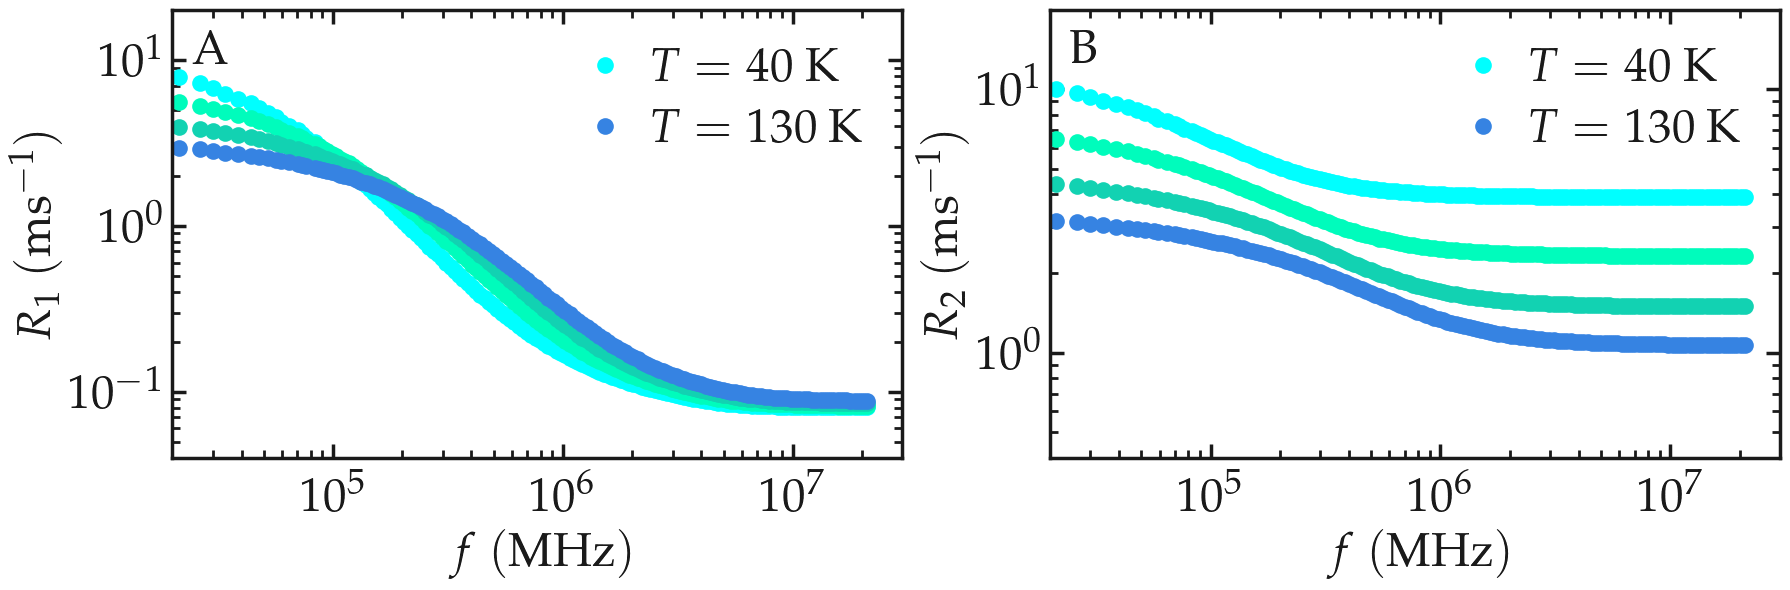

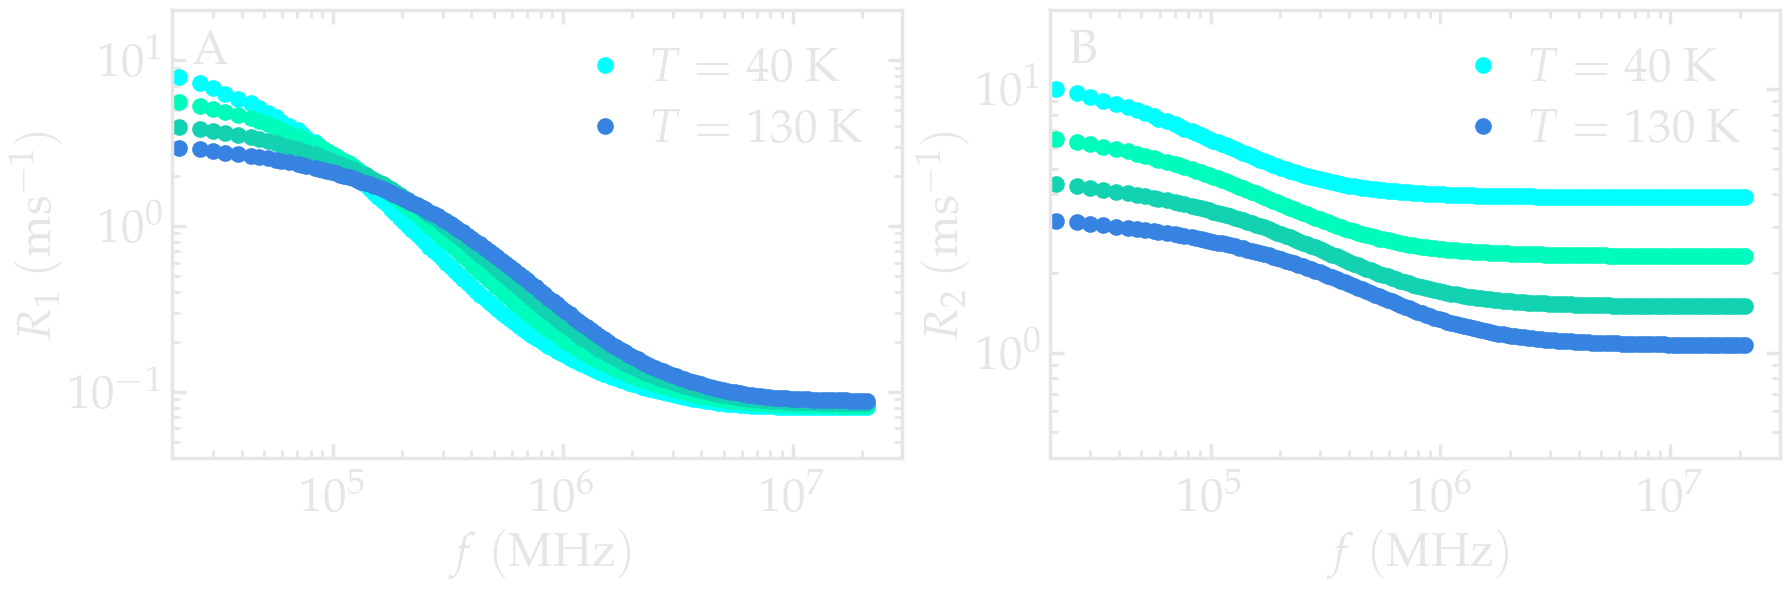

In [30]:
filename = "nmr-relaxation-rates-spectra"
colors = cmap_cyan_to_green_blue(np.linspace(0, 1, len(all_temperatures)//2))

for dark_mode in [False, True]:

    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                         transparency = True, use_serif=True, n_colone = 2)
    # Panel 1
    myplt.add_panel()
    for T, color in zip(all_temperatures[::2], colors):
        f, R1 = np.loadtxt(data_path+f"varying-temperature/T{T}/R1_vs_f.dat").T
        if ((T == all_temperatures[0]) | (T == all_temperatures[-2])):
            myplt.add_plot(x = f, y = R1*1000, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12,
                        data_label = f'$T = {np.int32(T*ref_temp)}~\mathrm K$')
        else:
            myplt.add_plot(x = f, y = R1*1000, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12) 
    myplt.complete_panel(ylabel = r'$R_1~(\mathrm{ms}^{-1})$', xlabel = r'$f~(\mathrm{MHz})$',
                         xpad = 15, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(2e4, 3e7), y_boundaries=(4e-2, 2e1))
    # Panel 2
    myplt.add_panel()
    for T, color in zip(all_temperatures[::2], colors):
        f, R2 = np.loadtxt(data_path+f"varying-temperature/T{T}/R2_vs_f.dat").T
        if ((T == all_temperatures[0]) | (T == all_temperatures[-2])):
            myplt.add_plot(x = f, y = R2*1000, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12,
                        data_label = f'$T = {np.int32(T*ref_temp)}~\mathrm K$')
        else:
            myplt.add_plot(x = f, y = R2*1000, type = "loglog", linewidth_data = 3,
                        marker = "o", data_color = color[:3], markersize = 12) 
    myplt.complete_panel(ylabel = r'$R_2~(\mathrm{ms}^{-1})$', xlabel = r'$f~(\mathrm{MHz})$',
                         xpad = 15, legend=True, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(2e4, 3e7), y_boundaries=(4e-1, 2e1))
    myplt.add_subplotlabels(type_label_panel = "A")
    myplt.save_figure(filename = filename, saving_path = git_path+path_figures)


In [31]:
spin = 0.5
GAMMA = 2 * np.pi * 42.6e6
K = (3 / 2) * (cst.mu_0 / 4 / np.pi) ** 2 \
    * cst.hbar ** 2 * GAMMA ** 4 * spin * (1 + spin)  # m6 / s2

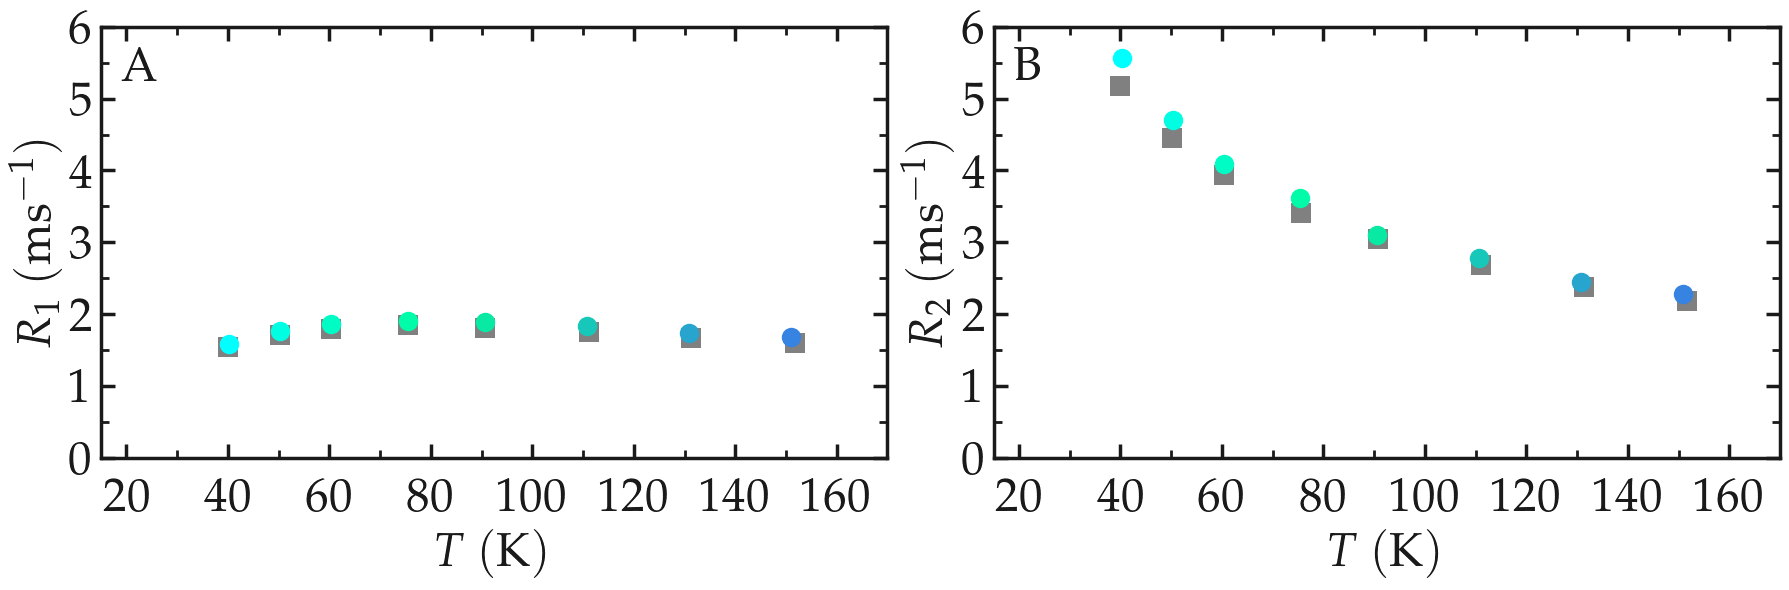

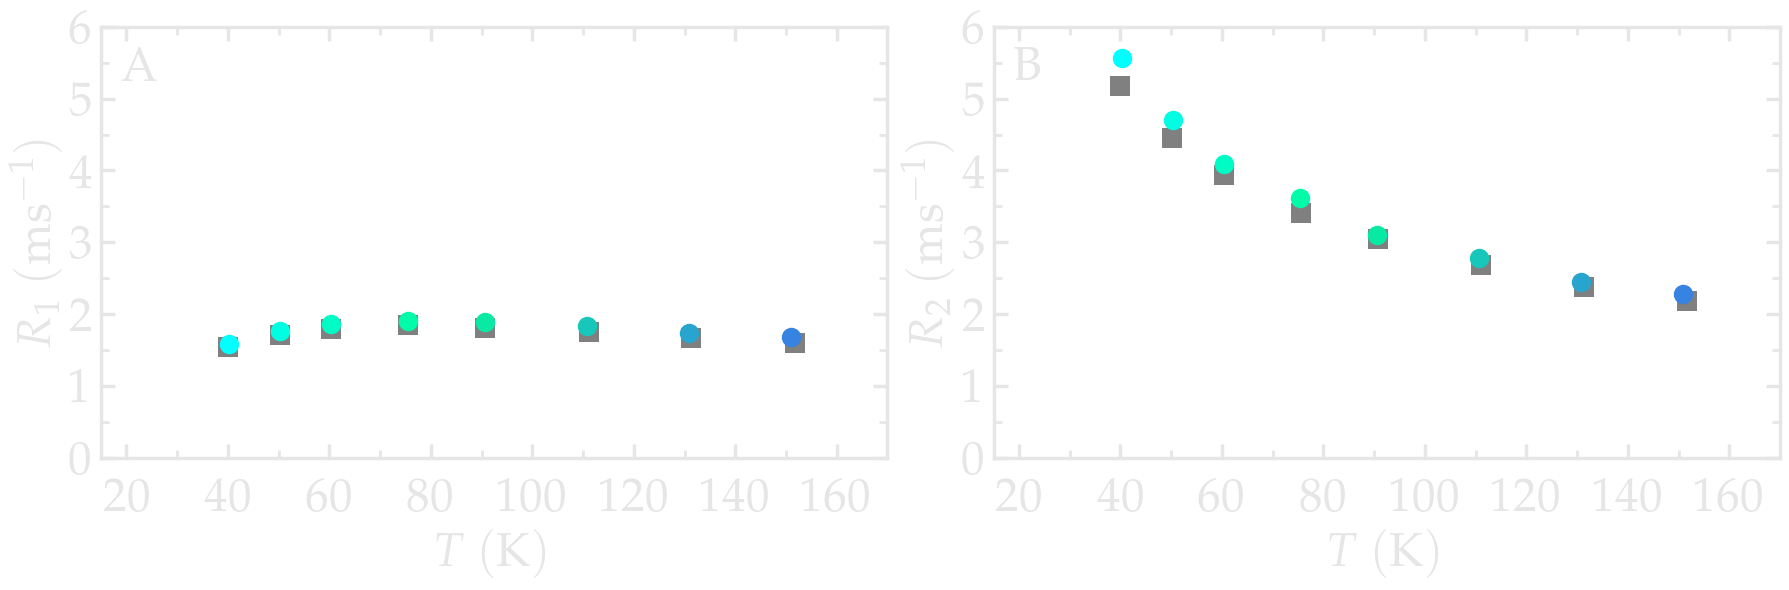

In [39]:
filename = "nmr-relaxation-rates-at-target"

T_grivet, R1_grivet = np.loadtxt("grivet-2005-data/data-R1-R2/R1.dat").T
R1_grivet *= K / (3e-10)**6 * (ref_time*1e-15) /6 
T_grivet, R2_grivet = np.loadtxt("grivet-2005-data/data-R1-R2/R2.dat").T
R2_grivet *= K / (3e-10)**6 * (ref_time*1e-15) / 6
_, R1, dR1 = np.loadtxt(data_path+f"varying-temperature/R1_at_target_vs_temperature.dat").T
T, R2, dR2 = np.loadtxt(data_path+f"varying-temperature/R2_at_target_vs_temperature.dat").T

colors = cmap_cyan_to_green_blue(np.linspace(0, 1, len(T_grivet)))

for dark_mode in [False, True]:

    myplt = PltTools()
    myplt.prepare_figure(fig_size = (18,6), dark_mode = dark_mode,
                         transparency = True, use_serif=True, n_colone = 2)
    # Panel 1
    myplt.add_panel()
    myplt.add_plot(x = T_grivet*ref_temp, y = R1_grivet*1000, type = "plot", linewidth_data = 3,
                marker = "s", data_color = np.array([0.5, 0.5, 0.5]), markersize = 14)
    for T0, R10, color in zip(T, R1, colors):
        myplt.add_plot(x = T0*ref_temp, y = R10*1000, type = "plot", linewidth_data = 3,
                       marker = "o", data_color = color[:3], markersize = 14, data_label = r'$R_1$')
    myplt.complete_panel(ylabel = r'$R_1~(\mathrm{ms}^{-1})$', xlabel = r'$T~(\mathrm{K})$',
                         xpad = 15, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(15, 170), y_boundaries=(0, 6))

    myplt.add_panel()
    myplt.add_plot(x = T_grivet*ref_temp, y = R2_grivet*1000, type = "plot", linewidth_data = 3,
                marker = "s", data_color = np.array([0.5, 0.5, 0.5]), markersize = 14)
    for T0, R20, color in zip(T, R2, colors):
        myplt.add_plot(x = T0*ref_temp, y = R20*1000, type = "plot", linewidth_data = 3,
                    marker = "o", data_color = color[:-1], markersize = 14, data_label = r'$R_2$')
    myplt.complete_panel(ylabel = r'$R_2~(\mathrm{ms}^{-1})$', xlabel = r'$T~(\mathrm{K})$',
                         xpad = 15, legend=False, handlelength_legend=1)
    myplt.set_boundaries(x_boundaries=(15, 170), y_boundaries=(0, 6))
    myplt.add_subplotlabels(type_label_panel = "A")
    myplt.save_figure(filename = filename, saving_path = git_path+path_figures)

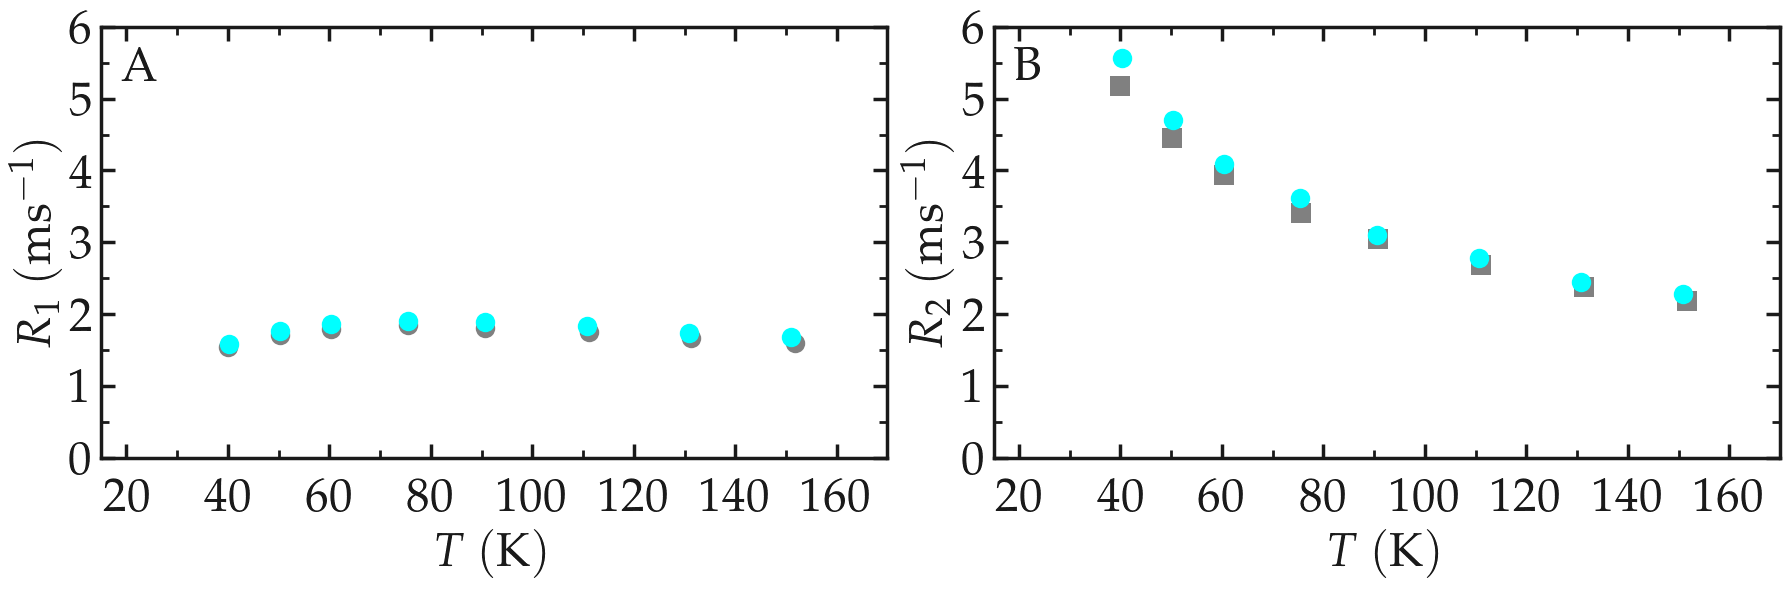

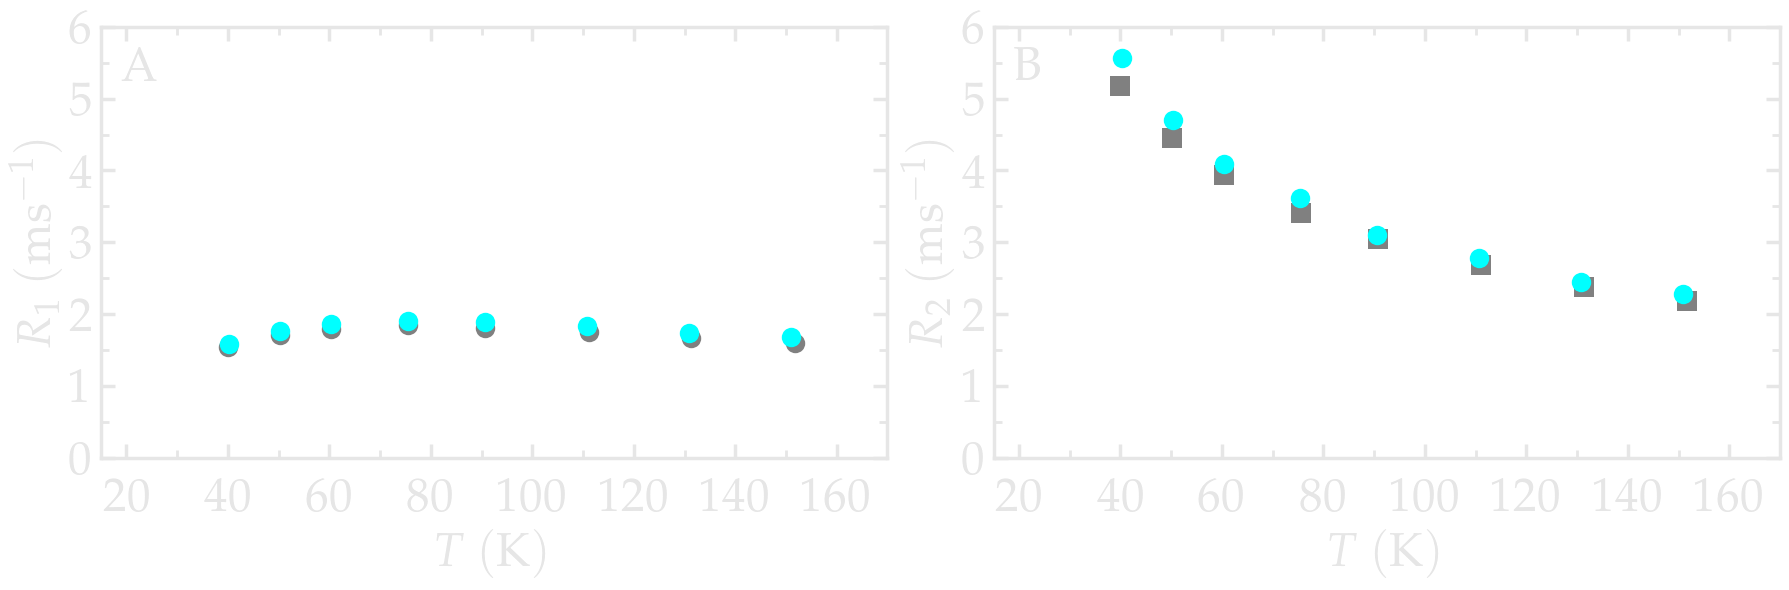